#Deep reinfocement learning

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from tensorflow import keras
import numpy as np

from keras.layers import Dense, Activation

###Reviewing the learning types:

* Supervised (labels, results)
* Unsupervised (generators count as supervised)
* Reinforcement learning.

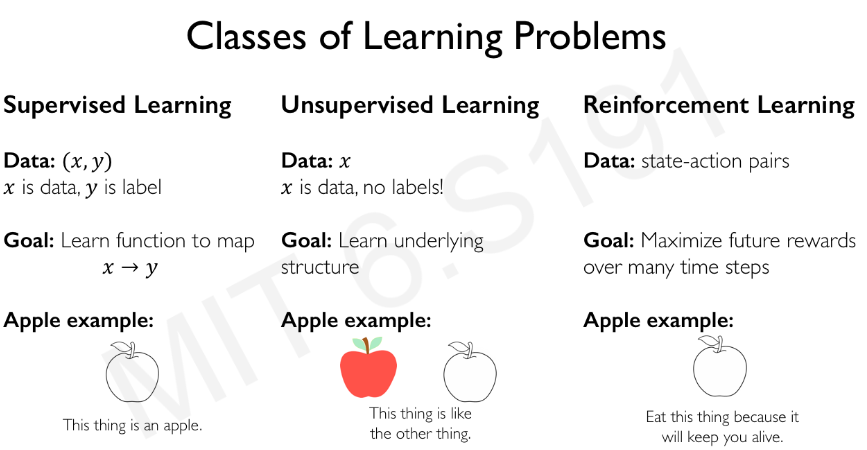

#In reinforcement learning we have two key parts

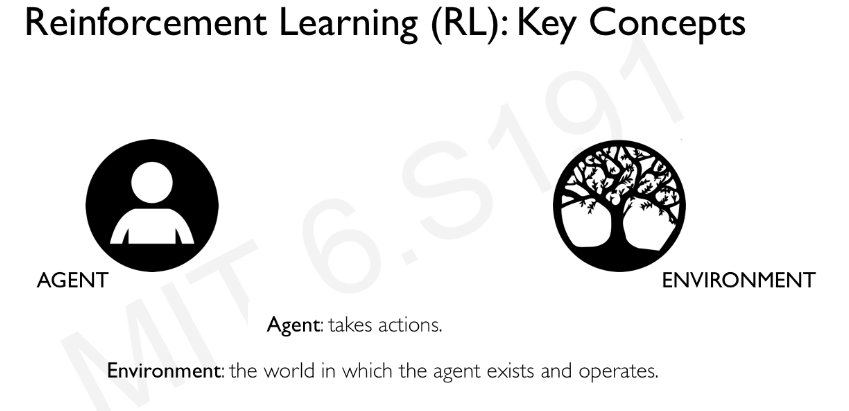

Steps of RL:

1. The agent can use a possible set of actions at any time.

2. The environment gives an observation after taking an action.

3. The state changes.

4. A "reward" is given as feedback that measures the success or failure of the agent action.




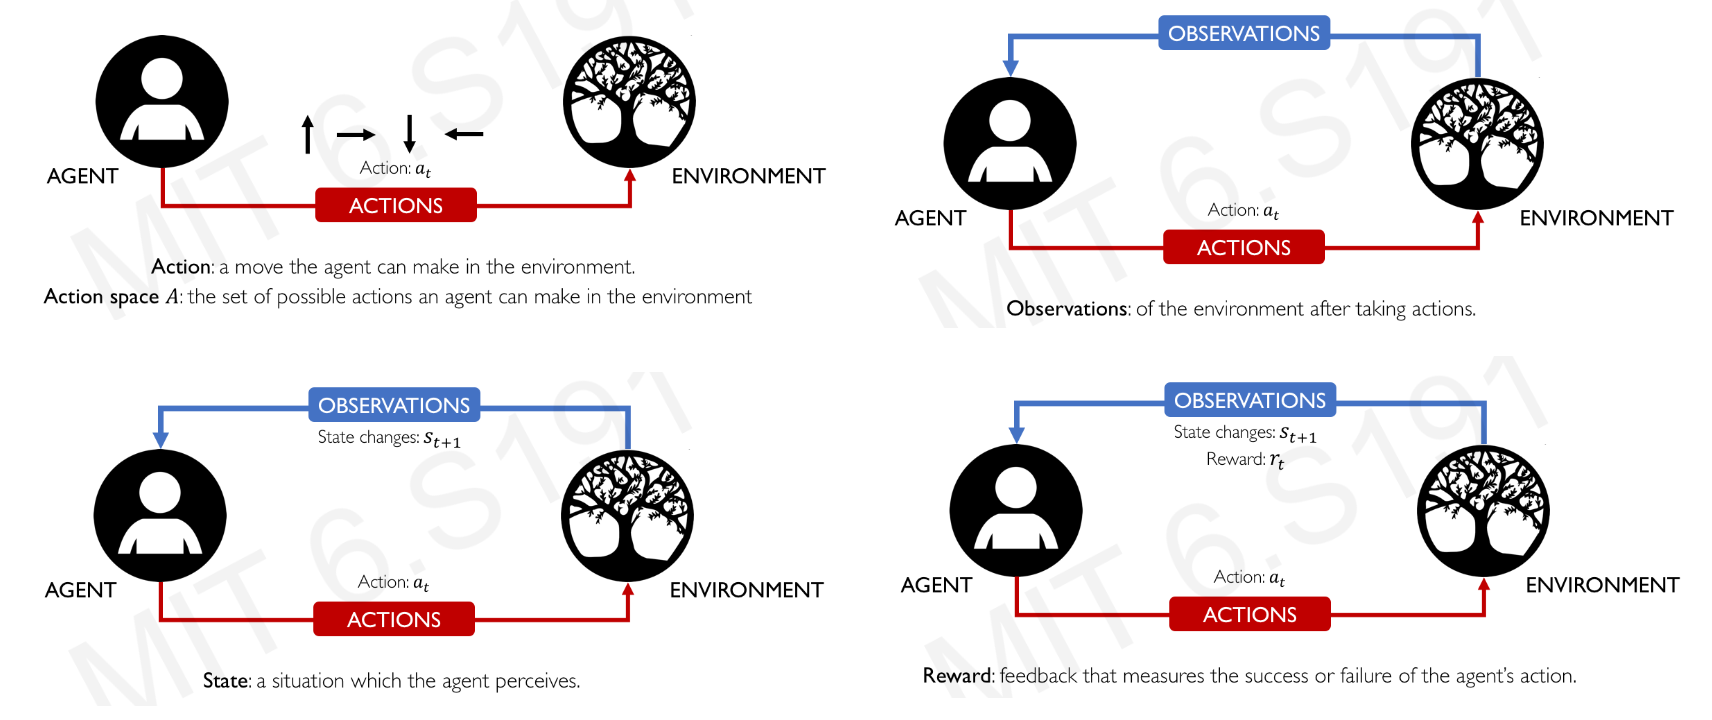

###The reward

To give the agent proper feedback the you can use:

* Total reward: The sumation of all of the individual rewards in time.

* Discounted Total Reward: You multiply a discounting factor by each of the rewards by any point in time.

You basically allways use the discounted reward as the reward function.


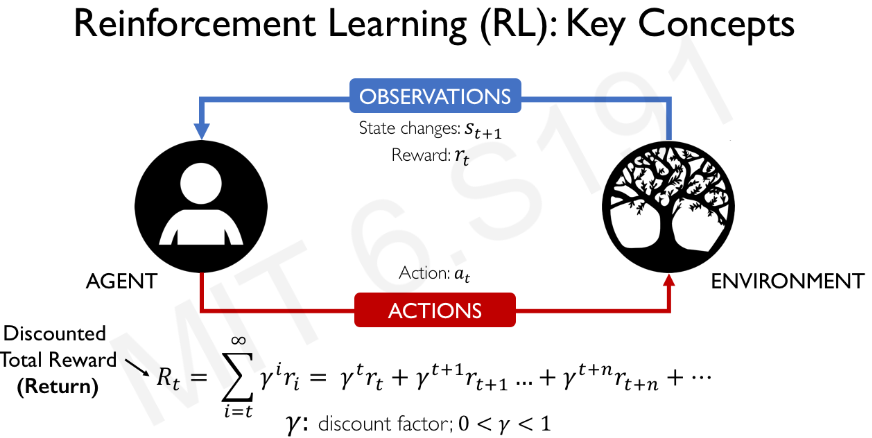

###The Q function

We allways want to take actions that maximizes the Q value.

The Q function takes as input the current state and the action the agent excecutes and returns the expected total discounted return that the agent could expect at that point in time. - this tells us that if the agent is in state S and takes an action A, the total ammount of discounted reward that it could obtain if it takes that action in that state is the result of the Q-function. 



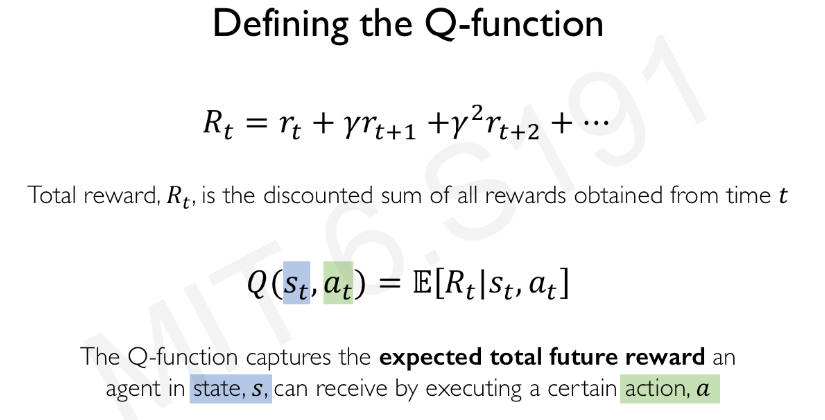

Now, if we have an agent that has access to the Q-function. 

* How can the agent use a Q-function to take actions in the environment?
  * You could simply feed all possible actions you could excecute at the time and evaluate which action gives a highest Q-Value.

To do this we need a policy.

The formula at the bottom (pi*(s) = argmaxQ(s,a) means that we evaluate our Q function over all possible actions and just pick the action that maximizes Q

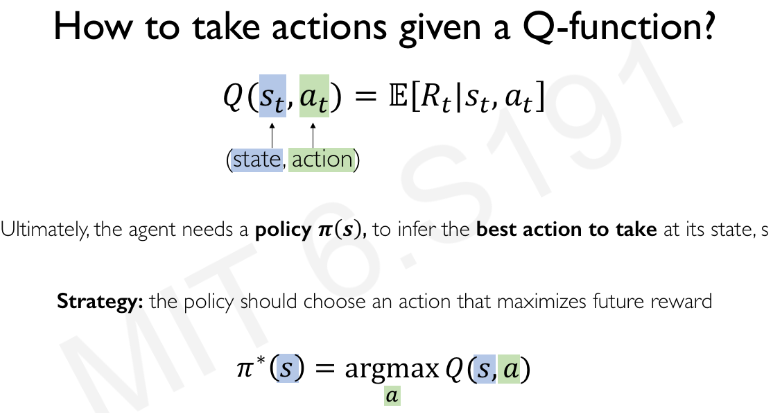

##We will focus on 2 classes of RL algorithms.

1. Value learning - We want the Neural Network to learn the Q-function, and then you use it to define your policy.

2. Policy learning - Directly learn the policy without the intermediate Q-function

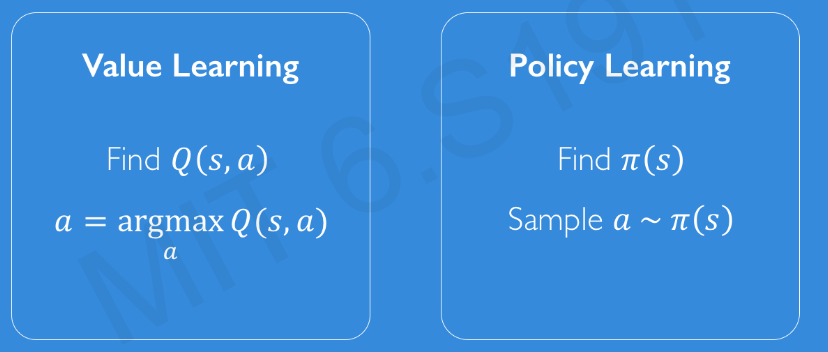

#Value learning



To do this, we have a Deep Q network, which takes as input:

1. State (what is coming from the environment)

2. A representation of the action we want to take.

And it returns the Q value of that state-action pair.

This method is fine but expensive, But if you want to create your policy you want to try out all of the possible different actions that you could excecute at that time ( which means you have to run the network N-times (number of actions) at every time instant you want an action) (image #1 of image #1)

The alternative is that you could have one network that takes as input its state but now it has learned to output all of the different q-values for all the actions (image #2 of image #1).






####But how do we train it to give us the best action

We have:

1. The target (true) Q-value: The value we get from just rolling out the episode of the agent inside of the environment (r). and we add it the maximum value of Q you could get from every action in the future - (i think this basically says, if we took this action, and then did everything perfectly, what would we get).
  
  `r + ymaxQ(s',a').`

2. The predicted Q-value - The output from the network: simply what the network predicts.

You can train a network to predict Q values now because you have a label and a prediction, which means you have a loss. (Image #4, mean squared error)
 



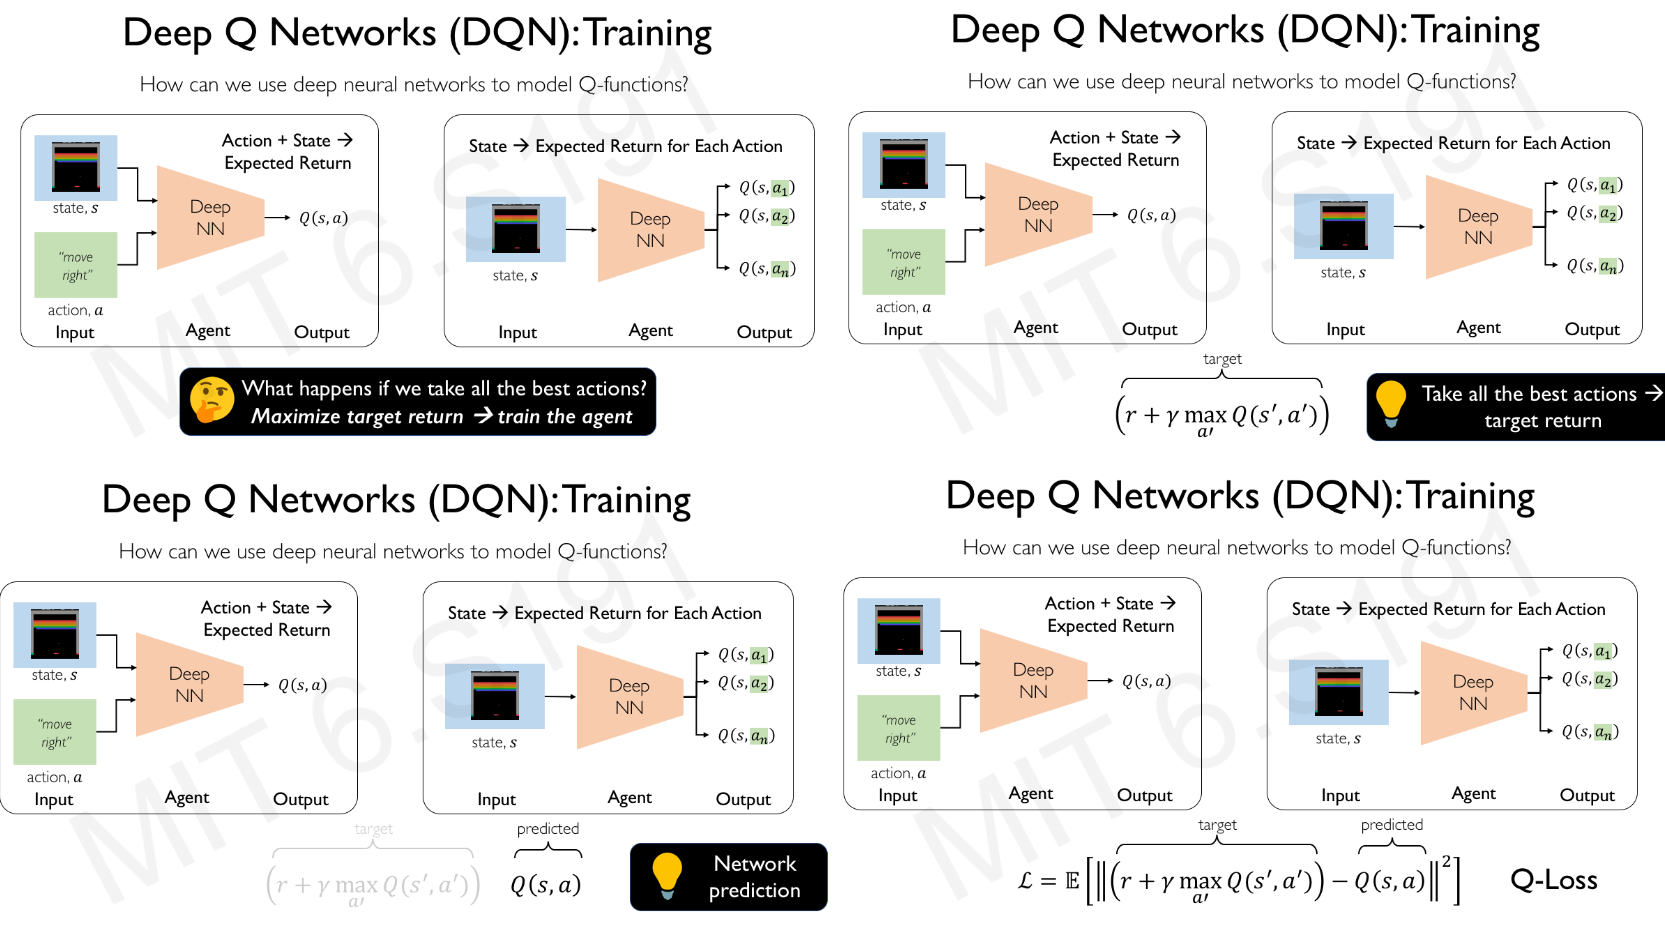

####To summarize

In the example of the atari game:

1. You have a state (pixels) that are fed into the network.

2. The NNet outputs the Q-value of each possible action.

3. Each of those Q-values will have an output that the network will predict.

4. You take the action that has the max Q-value



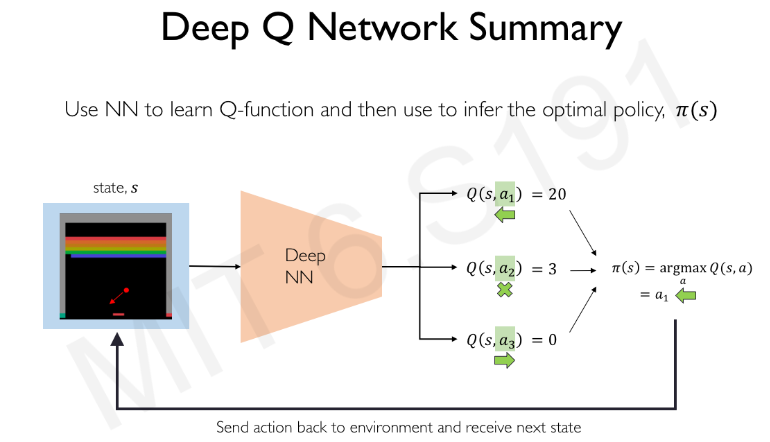

###Downsides of Q-learning

* Basically Q-learning struggles with continous environments and action spaces.

* Q-learning struggles with stochastic policies (randomly determined)




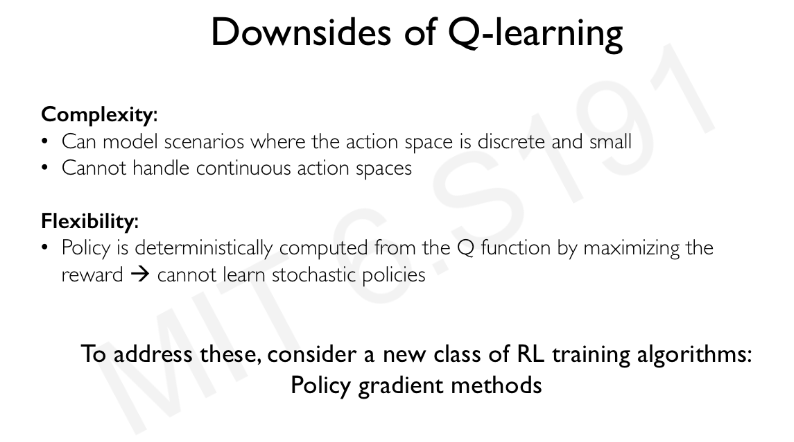

#Policy learning

* This can be used to get around the problems of dealing with continous action spaces and stochastic/probabilistic environments.

With policy learning we still take the input but we don't output the Q-function. We directly output the policy of the network (Which is a probability distribution over the space of all actions, given that state) - A.K.A - The probability of thaking that action will result in the highest Q-value.




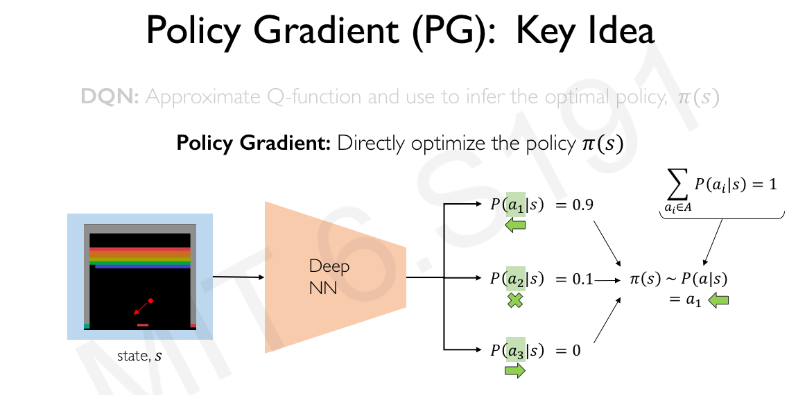

An advantage of this is that we are not constrained to categorical actions, rather we can have a curve of probabilities of the discrete actions.

Example: 
* Discrete tells you: go left. Continuous tells you go slow to the left

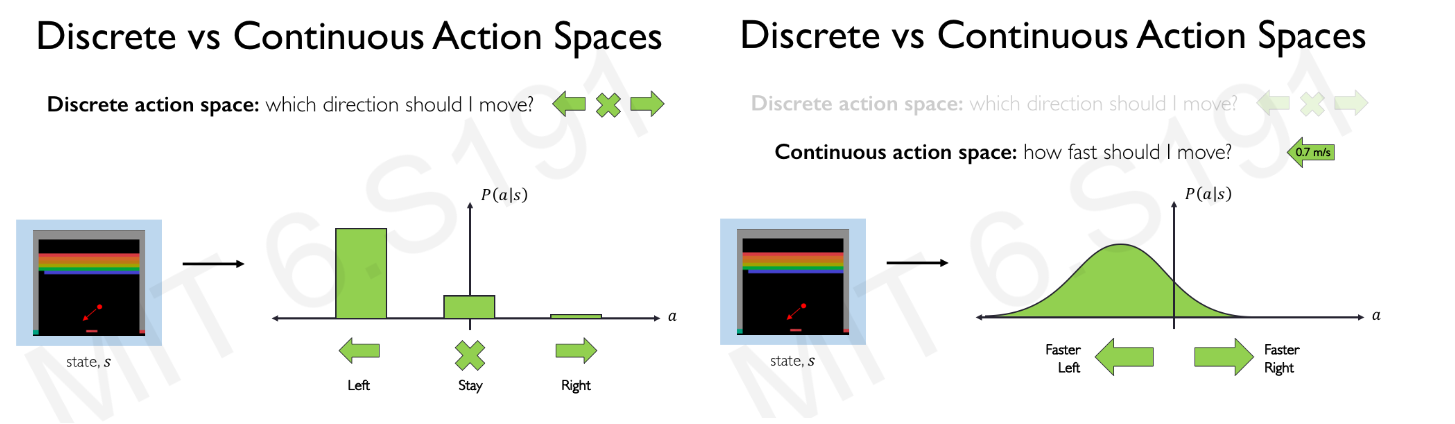

####To do this in a network:
* We can assume that our output follows a gaussian distribution -> then you parametrize the output of that gaussian with a mean and a variance. Now, at any point in time, our network is going to predict the mean and variance of that distribution.

Now, if we want to take an action, we simply sample from the distribution.



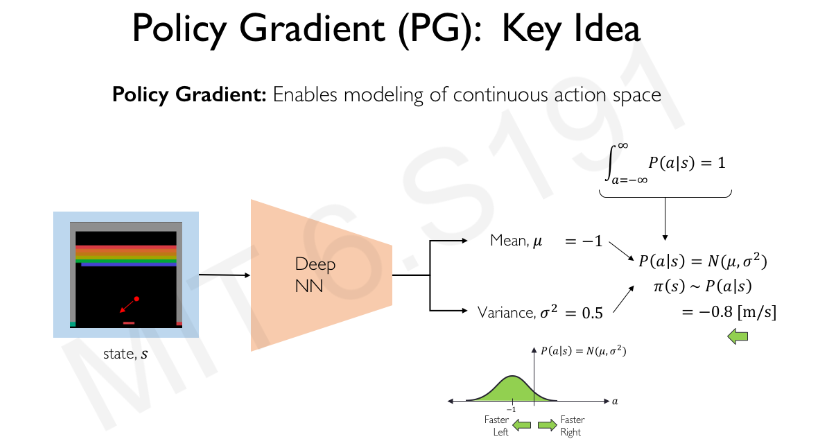

#Training policy gradients

##Self-driving cars Case Study

####Recap

From the original RL loop, we have agent, environment, and their interactions

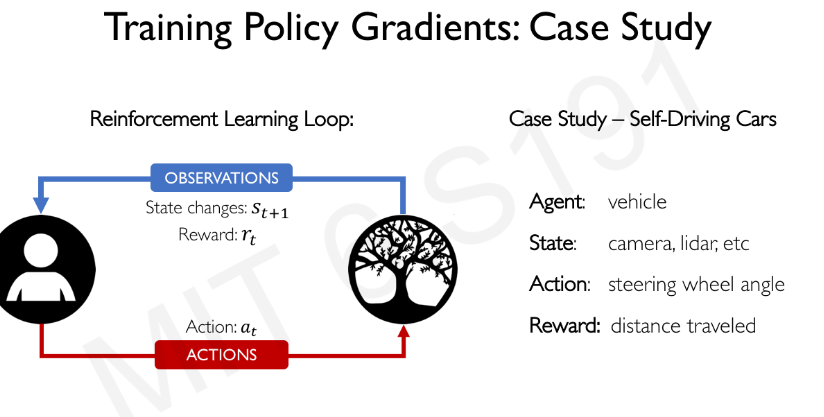

The training algorithm for policy gradients is a bit different than that of the Q-function.

1. Initialize the agent.
2. Run a policy until termination (it is supposed to not do well at the beggining)
3. Record everything that happened.
4. (and 5) . Given all of the (state,action,reward) pairs:
 * We first look right before the end (the crash) - and we decrease probability of these actions, we basically tell the model that those actions are undesirable.
 * We then look at actions taken further away from the event (with higher rewards) and increase the probability of those actions.

We iterate the process until we have the desired outcome.


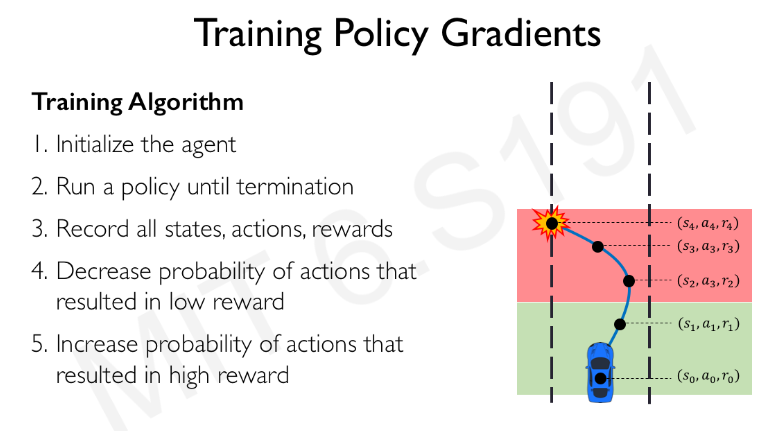

#How do we actually train/improve our policy.


##Loss function

1. The log-likelehood of selecting the action given the state that you are in - (this tells us how likely it was the action that you selected) 

2. The second term is the total discounted return that you recieved by taking that action. 

NOTE: NNets try to minimize the loss, so, if we took an action with large probability and then it gives us a large reward (we multiply them and it gives us a large number), then we add the negative in front, which gives us a large negative, which is what we want.

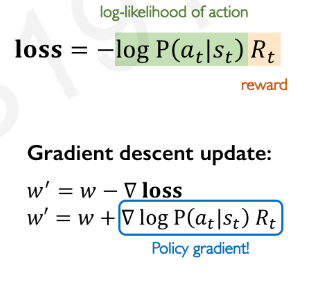

#Summary

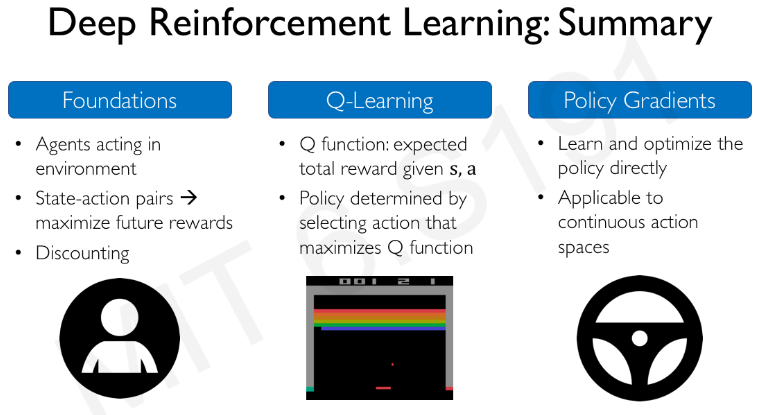